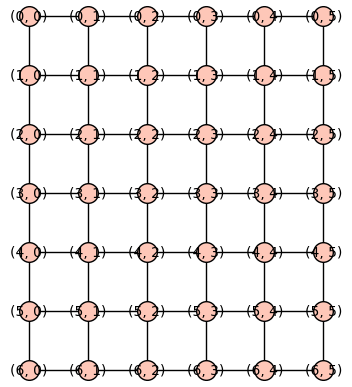

In [97]:
G = graphs.Grid2dGraph(7,6).show()

Optimal edges: [((4, 0), (2, 2)), ((0, 4), (6, 5)), ((2, 2), (0, 4)), ((6, 5), (6, 0)), ((6, 0), (4, 0))]


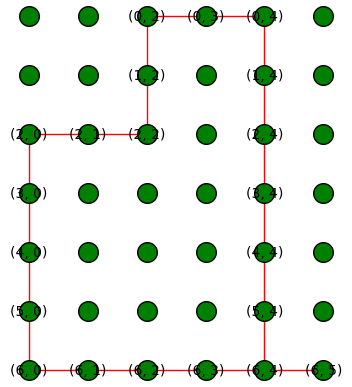

In [98]:
def calculate_path(start, end):
    """Calculate the Manhattan path between start and end"""
    path = []
    x1, y1 = start
    x2, y2 = end
    
    if x1 < x2:
        for x in range(x1, x2 + 1):
            path.append((x, y1))
    elif x1 > x2:
        for x in range(x1, x2 - 1, -1):
            path.append((x, y1))
    
    if y1 < y2:
        for y in range(y1, y2 + 1):
            path.append((x2, y))
    elif y1 > y2:
        for y in range(y1, y2 - 1, -1):
            path.append((x2, y))
    
    return path

def visualize(G, optimal_edges):
    """
    visualization optimal solution of the Traveling Salesman Problem (TSP)
    """
    path_edges = set() 
    for edge in optimal_edges:
        start, end = edge
        path = calculate_path(start, end)
        path_edges.update((path[i], path[i + 1]) for i in range(len(path) - 1))

    
    path_edges = [(u, v) for u, v in path_edges if u != v]

        
    path_graph = Graph()  
    path_graph.add_edges(path_edges)

    # Define positions for vertices based on their grid coordinates
    pos = {v: (v[1], -v[0]) for v in G.vertices()}  # Flip y-axis for better visualization

    # Draw the graph with paths
    path_graph.show(edge_color="red", vertex_color="green", pos=pos)
    
def solve_grid_tsp(grid_size, C):
    """
    Solve the Traveling Salesman Problem (TSP) on a grid of size grid_size x grid_size.
    """
    # Create the grid graph
    G = graphs.Grid2dGraph(*grid_size)  # Create the grid graph

    # Calculate Manhattan distances only for pairs in C
    distances = {
        (i, j): abs(i[0] - j[0]) + abs(i[1] - j[1]) for i in C for j in C if i != j
    }

    
    lp = MixedIntegerLinearProgram(maximization=False)
    x = lp.new_variable(binary=True)  # Binary variables for edges
    u = lp.new_variable(integer=True)    # Auxiliary variables for subtour elimination

    # Objective: Minimize the total cost of the tour
    lp.set_objective(
        lp.sum(distances[(i, j)] * x[(i, j)] for i in C for j in C if i != j)
    )

    # Degree constraints: each vertex in C must have one incoming and one outgoing edge
    for i in C:
        lp.add_constraint(lp.sum(x[(i, j)] for j in C if i != j) == 1)  # Outgoing edges
        lp.add_constraint(lp.sum(x[(j, i)] for j in C if i != j) == 1)  # Incoming edges

    # No self-loops
    for i in C:
        lp.add_constraint(x[(i, i)] == 0)

    # Subtour elimination constraints
    n = len(C)
    C_list = list(C)  
    for i in C_list[1:]:
        for j in C_list[1:]:
            if i != j:
                lp.add_constraint(
                    u[i] - u[j] + 1 <= (n - 1)*(1 - x[(i, j)])
                )

    # Variable bounds for auxiliary variables
    for i in C_list[1:]:
        lp.add_constraint(u[i] >= 1)
        lp.add_constraint(u[i] <= n - 1)

    # Solve the LP
    try:
        solution = lp.solve()
        optimal_edges = [ (i, j) for i in C for j in C if i != j and lp.get_values(x[(i, j)]) != 0]
        print("Optimal edges:", optimal_edges)
        visualize(G, optimal_edges)  

    except Exception as e:
        print("Solver Exception:", e)



grid_size = (7, 6)  
C = {(0, 4), (2, 2), (4, 0), (6,0), (6,5)}  # Obligatory vertices for the cycle
solve_grid_tsp(grid_size, C)


Optimal edges: [((4, 0), (6, 0)), ((0, 4), (2, 2)), ((2, 2), (4, 0)), ((6, 5), (7, 7)), ((7, 7), (0, 4)), ((6, 0), (6, 5))]


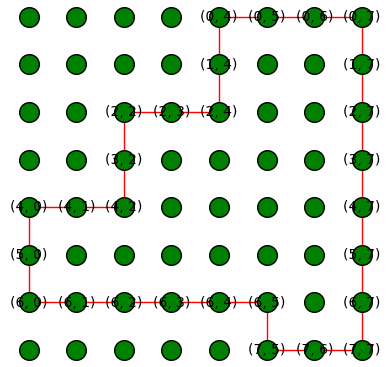

In [99]:
grid_size = (8,8)
C = {(0, 4), (2, 2), (4, 0), (6,0), (6,5), (7,7)} 
solve_grid_tsp(grid_size, C)
